# Simulation of the Game of Craps
The game of craps involves the shooter throwing two dice.  The payoff 
depends on the sum of the numbers on the dice.  This script simulates the
proportion of times that the shooter wins.

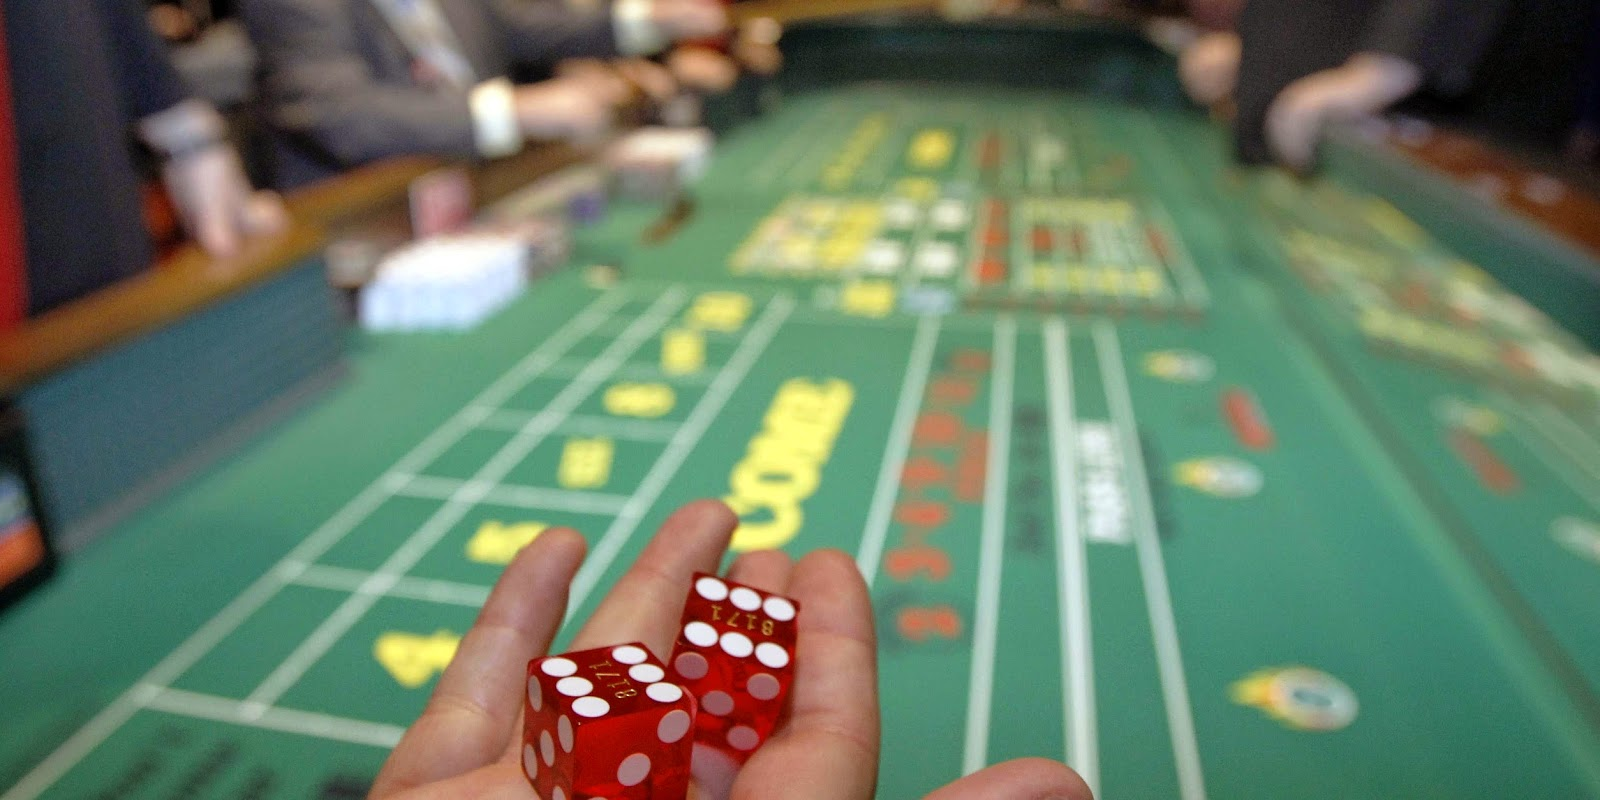

On the first roll of the two dice, the shooter

 * Automatically _wins_ if the numbers on the dice sum to 7 or 11, and
 * Automtically _loses_ if the numbers on the dice sum to 2, 3, or 12.

If the first roll of the two dice results in a sum of 4, 5, 6, 8, 9, or
10, then the shooter rolls again and again until either

 * the sum is the same number as the first roll, in which case the shooter _wins_ , or
 * the sum is a 7, in which case the shooter _loses_.


In [1]:
# Import necessary packages
import numpy as np
import random as rd
import matplotlib.pyplot as plt

By providing an input to the function *craps*, we get an IID vector of wins (ones) or losses (zeros)

In [3]:
wins = craps(8)
wins

array([0., 0., 1., 1., 1., 1., 1., 0.])

If we do it again, we get a different (random) output:

In [4]:
wins = craps(8)
wins

array([0., 0., 1., 1., 1., 0., 1., 0.])

## Computing the probability of a win by the shooter
The probability of a win is _approximately_ the sample proportion (sample
mean) of wins over a large number rounds.  For example

In [5]:
probWin = np.mean(craps(100))
probWin

0.63

In [6]:
probWin = np.mean(craps(100))
probWin

0.49

Note that the proportion is close to 0.5, but with such a small sample,
how can we know how accurate our answer is?  We will see later that the
error using $nRounds$ for our sample proportion is about
$1/\sqrt{\texttt{nRounds}}$.  Thus, using $nRounds = 1e6$ should give
an error of about 0.001.

In [17]:
probWin = np.mean(craps(100000))
probWin

0.49338

With a win probability of about 0.493, this game slightly favors the *house*.

# Monte Carlo answers do _not_ converge montonically
Suppose that we successively increase the number of observations by one
and look how the sample mean approaches the true mean

In [16]:
nSample = 1000000
crapsResults = craps(nSample)
probWinVec = np.divide(np.cumsum(crapsResults),np.arange(1,nSample+1))

Text(0, 0.5, 'Win Probability')

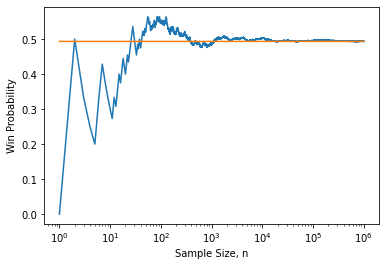

In [33]:
plt.semilogx(np.arange(1,nSample+1), probWinVec,np.arange(1,nSample+1), np.ones(nSample)*probWin)
plt.xlabel('Sample Size, n')
plt.ylabel('Win Probability')

As the plot shows, the approximations oscillate around the true answer, but the oscillations decrease in size as the sample size increases.

### Craps function that provides $nRounds$ of IID wins/losses

In [2]:
def craps(nRounds):
    wins = np.zeros(nRounds) # initialize a logical vector of size nRounds
    for i in range(nRounds):
        firstRoll =  rd.randint(1,6) + rd.randint(1,6) # sum of two dice, each uniformly having 1 through 6
        if firstRoll == 7 or firstRoll == 11: # automatic win
            wins[i] = 1
        elif firstRoll == 2 or firstRoll == 3 or firstRoll == 12: # automatic lose
            wins[i] = 0
        else: # firstRoll is a 4, 5, 6, 8, 9, or 10
            while True: # keep rolling until win or lose
                nextRoll =  rd.randint(1,6) + rd.randint(1,6) # try to repeat firstRoll
                if nextRoll == firstRoll: # shooter wins
                    wins[i] = 1
                    break
                elif nextRoll == 7: # shooter loses
                    wins[i] = 0
                    break
    return wins